# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

**Dataset yang digunakan**: Vegetable Image Dataset dari Kaggle  
**Link**: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset  
**Deskripsi**: Dataset berisi gambar sayuran dengan berbagai kategori untuk tugas image classification.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library untuk data manipulation dan visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import shutil

# Import library untuk image preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Import library untuk deep learning (akan digunakan di tahap modelling)
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Set path ke dataset lokal
path = "../Vegetables_raw"

print("Path to dataset files:", path)

# Jika ingin download dari Kaggle (uncomment baris di bawah):
# import kagglehub
# path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")

# Explore struktur dataset
if os.path.exists(path):
    print("\nDataset structure:")
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f'{indent}{os.path.basename(root)}/')
        if level < 2:  # Batasi kedalaman untuk menghindari output terlalu panjang
            subindent = ' ' * 2 * (level + 1)
            for file in files[:5]:  # Tampilkan 5 file pertama saja
                print(f'{subindent}{file}')
            if len(files) > 5:
                print(f'{subindent}... and {len(files) - 5} more files')
else:
    print(f"\n⚠️ Warning: Dataset path tidak ditemukan!")
    print(f"Silakan download dataset dari Kaggle dan ekstrak ke: {os.path.abspath(path)}")
    print("Atau uncomment kode kagglehub di atas untuk download otomatis.")

Path to dataset files: ../Vegetables_raw

Dataset structure:
Vegetables_raw/
  test/
    Bean/
    Broccoli/
    Capsicum/
    Carrot/
    Cauliflower/
    Papaya/
    Potato/
    Pumpkin/
    Radish/
    Tomato/
  train/
    Bean/
    Broccoli/
    Capsicum/
    Carrot/
    Cauliflower/
    Papaya/
    Potato/
    Pumpkin/
    Radish/
    Tomato/
  validation/
    Bean/
    Broccoli/
    Capsicum/
    Carrot/
    Cauliflower/
    Papaya/
    Potato/
    Pumpkin/
    Radish/
    Tomato/


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# EDA 1: Identifikasi struktur folder dan kategori
# Dataset vegetables memiliki struktur: train/, test/, validation/
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
val_dir = os.path.join(path, 'validation')

# Cek apakah folder ada
print("Available directories:")
if os.path.exists(train_dir):
    print(f"✓ Train directory: {train_dir}")
if os.path.exists(test_dir):
    print(f"✓ Test directory: {test_dir}")
if os.path.exists(val_dir):
    print(f"✓ Validation directory: {val_dir}")

# Dapatkan daftar kategori/kelas dari folder train
categories = sorted(os.listdir(train_dir))
print(f"\n📊 Total categories: {len(categories)}")
print(f"Categories: {categories}")

Available directories:
✓ Train directory: ../Vegetables_raw\train
✓ Test directory: ../Vegetables_raw\test
✓ Validation directory: ../Vegetables_raw\validation

📊 Total categories: 10
Categories: ['Bean', 'Broccoli', 'Capsicum', 'Carrot', 'Cauliflower', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [4]:
# EDA 2: Hitung jumlah gambar per kategori untuk train, test, val
data_distribution = []

for dataset_type, dataset_dir in [('Train', train_dir), ('Test', test_dir), ('Validation', val_dir)]:
    if os.path.exists(dataset_dir):
        for category in categories:
            category_path = os.path.join(dataset_dir, category)
            if os.path.exists(category_path):
                num_images = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
                data_distribution.append({
                    'Dataset': dataset_type,
                    'Category': category,
                    'Count': num_images
                })

# Buat DataFrame untuk analisis
df_distribution = pd.DataFrame(data_distribution)
print("\n📈 Data Distribution:")
print(df_distribution.pivot_table(index='Category', columns='Dataset', values='Count', fill_value=0))

# Total per dataset
print("\n📊 Total Images per Dataset:")
print(df_distribution.groupby('Dataset')['Count'].sum())


📈 Data Distribution:
Dataset       Test   Train  Validation
Category                              
Bean         200.0  1000.0       200.0
Broccoli     200.0  1000.0       200.0
Capsicum     200.0  1000.0       200.0
Carrot       200.0  1000.0       200.0
Cauliflower  200.0  1000.0       200.0
Papaya       200.0  1000.0       200.0
Potato       200.0  1000.0       200.0
Pumpkin      200.0  1000.0       200.0
Radish       200.0  1000.0       200.0
Tomato       200.0  1000.0       200.0

📊 Total Images per Dataset:
Dataset
Test           2000
Train         10000
Validation     2000
Name: Count, dtype: int64


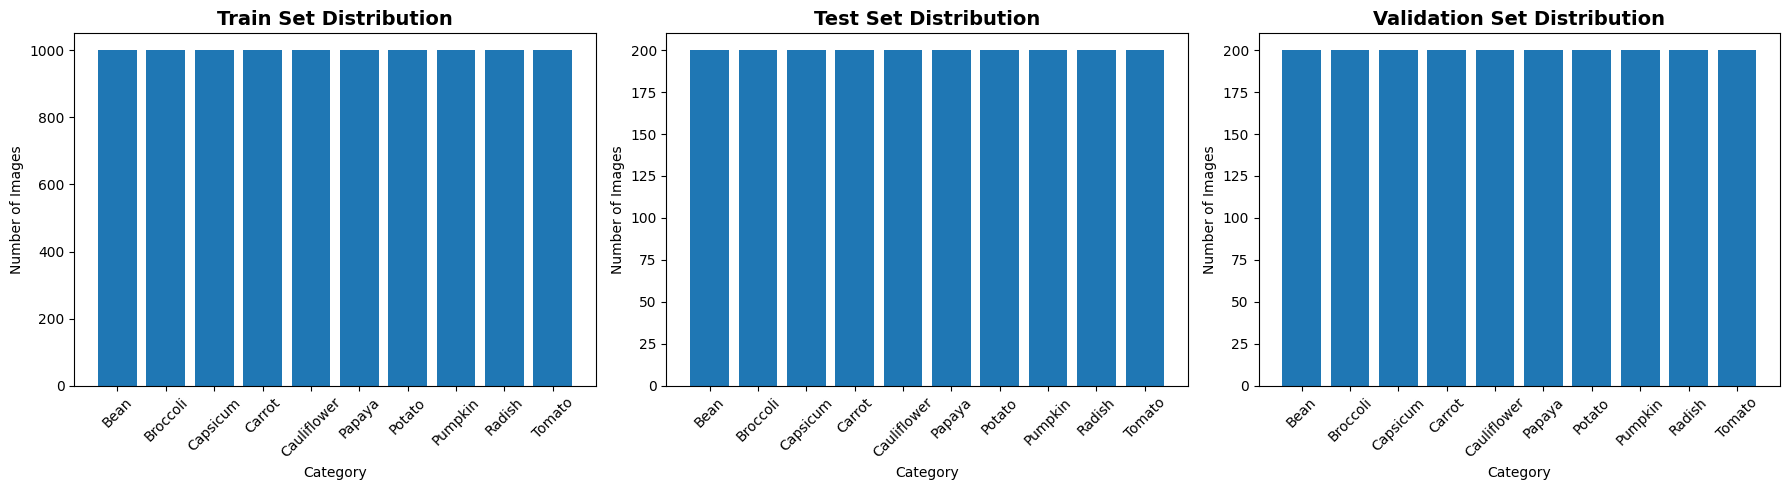

In [5]:
# EDA 3: Visualisasi distribusi data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset_type in enumerate(['Train', 'Test', 'Validation']):
    dataset_data = df_distribution[df_distribution['Dataset'] == dataset_type]
    axes[idx].bar(dataset_data['Category'], dataset_data['Count'])
    axes[idx].set_title(f'{dataset_type} Set Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Category')
    axes[idx].set_ylabel('Number of Images')
    axes[idx].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

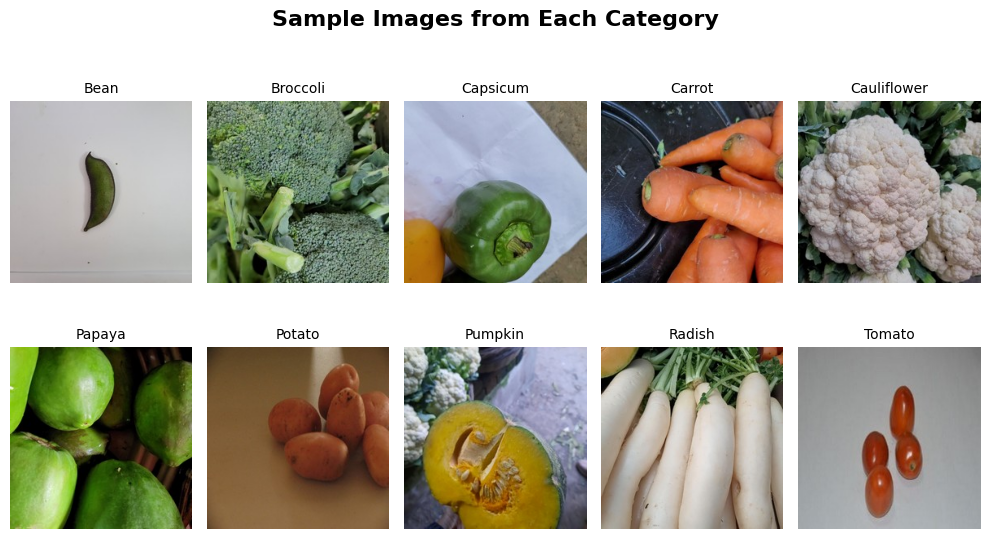

In [6]:
# EDA 4: Tampilkan sample gambar dari setiap kategori
fig, axes = plt.subplots(2, 5, figsize=(10, 6))
fig.suptitle('Sample Images from Each Category', fontsize=16, fontweight='bold')

for idx, category in enumerate(categories[:10]):  # Tampilkan max 10 kategori
    if idx < 10:
        row = idx // 5
        col = idx % 5
        
        # Ambil satu gambar sample dari kategori
        category_path = os.path.join(train_dir, category)
        images = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        if images:
            img_path = os.path.join(category_path, images[0])
            img = Image.open(img_path)
            axes[row, col].imshow(img)
            axes[row, col].set_title(category, fontsize=10)
            axes[row, col].axis('off')

plt.tight_layout()
plt.show()

🔍 Analyzing image dimensions...

📐 Image Dimensions Statistics (from 50 samples):
       Width  Height  Aspect_Ratio
count   50.0    50.0          50.0
mean   224.0   224.0           1.0
std      0.0     0.0           0.0
min    224.0   224.0           1.0
25%    224.0   224.0           1.0
50%    224.0   224.0           1.0
75%    224.0   224.0           1.0
max    224.0   224.0           1.0


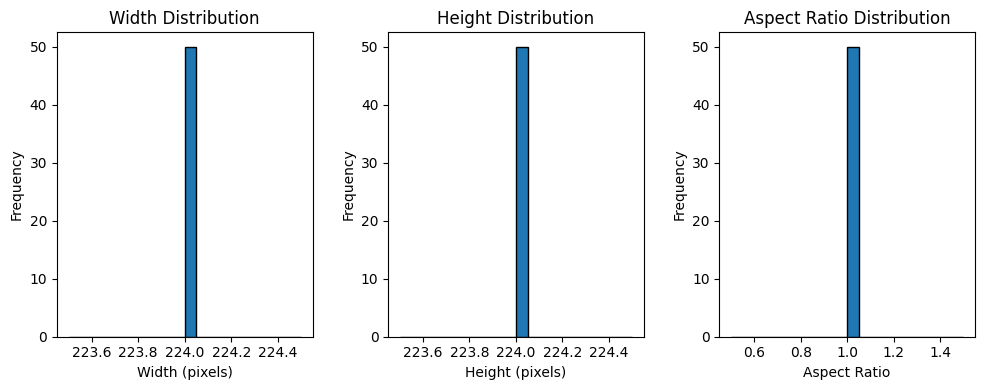

In [7]:
# EDA 5: Analisis dimensi gambar
print("🔍 Analyzing image dimensions...")
image_dimensions = []

# Sample beberapa gambar dari train set
sample_size = 100
sample_count = 0

for category in categories:
    category_path = os.path.join(train_dir, category)
    images = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    for img_file in images[:5]:  # 5 gambar per kategori
        if sample_count >= sample_size:
            break
        img_path = os.path.join(category_path, img_file)
        img = Image.open(img_path)
        image_dimensions.append({
            'Width': img.width,
            'Height': img.height,
            'Aspect_Ratio': img.width / img.height
        })
        sample_count += 1
    
    if sample_count >= sample_size:
        break

df_dimensions = pd.DataFrame(image_dimensions)
print(f"\n📐 Image Dimensions Statistics (from {len(df_dimensions)} samples):")
print(df_dimensions.describe())

# Visualisasi distribusi dimensi
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].hist(df_dimensions['Width'], bins=20, edgecolor='black')
axes[0].set_title('Width Distribution')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_dimensions['Height'], bins=20, edgecolor='black')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')

axes[2].hist(df_dimensions['Aspect_Ratio'], bins=20, edgecolor='black')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].set_xlabel('Aspect Ratio')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# PREPROCESSING 1: Membuat dataframe dengan path gambar dan label
def create_dataframe_from_directory(base_dir, categories):
    """
    Membuat dataframe berisi path gambar dan labelnya
    """
    data = []
    for category in categories:
        category_path = os.path.join(base_dir, category)
        if os.path.exists(category_path):
            images = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            for img_file in images:
                img_path = os.path.join(category_path, img_file)
                data.append({
                    'image_path': img_path,
                    'label': category
                })
    return pd.DataFrame(data)

# Buat dataframe untuk train, test, dan validation
df_train = create_dataframe_from_directory(train_dir, categories)
df_test = create_dataframe_from_directory(test_dir, categories)
df_val = create_dataframe_from_directory(val_dir, categories)

print("✅ Dataframes created:")
print(f"Train set: {len(df_train)} images")
print(f"Test set: {len(df_test)} images")
print(f"Validation set: {len(df_val)} images")

# Tampilkan sample
print("\nSample from train set:")
print(df_train.head())

✅ Dataframes created:
Train set: 10000 images
Test set: 2000 images
Validation set: 2000 images

Sample from train set:
                              image_path label
0  ../Vegetables_raw\train\Bean\0026.jpg  Bean
1  ../Vegetables_raw\train\Bean\0028.jpg  Bean
2  ../Vegetables_raw\train\Bean\0029.jpg  Bean
3  ../Vegetables_raw\train\Bean\0030.jpg  Bean
4  ../Vegetables_raw\train\Bean\0034.jpg  Bean


In [9]:
# PREPROCESSING 2: Label Encoding
# Encode label menjadi angka
label_encoder = LabelEncoder()
label_encoder.fit(categories)

df_train['label_encoded'] = label_encoder.transform(df_train['label'])
df_test['label_encoded'] = label_encoder.transform(df_test['label'])
df_val['label_encoded'] = label_encoder.transform(df_val['label'])

print("✅ Label encoding completed!")
print("\nLabel mapping:")
for idx, category in enumerate(label_encoder.classes_):
    print(f"{category}: {idx}")

print("\nSample with encoded labels:")
print(df_train[['image_path', 'label', 'label_encoded']].head())

✅ Label encoding completed!

Label mapping:
Bean: 0
Broccoli: 1
Capsicum: 2
Carrot: 3
Cauliflower: 4
Papaya: 5
Potato: 6
Pumpkin: 7
Radish: 8
Tomato: 9

Sample with encoded labels:
                              image_path label  label_encoded
0  ../Vegetables_raw\train\Bean\0026.jpg  Bean              0
1  ../Vegetables_raw\train\Bean\0028.jpg  Bean              0
2  ../Vegetables_raw\train\Bean\0029.jpg  Bean              0
3  ../Vegetables_raw\train\Bean\0030.jpg  Bean              0
4  ../Vegetables_raw\train\Bean\0034.jpg  Bean              0


Original image path: ../Vegetables_raw\train\Bean\0026.jpg
Original size: (224, 224)
Preprocessed shape: (224, 224, 3)
Pixel value range: [0.024, 0.843]


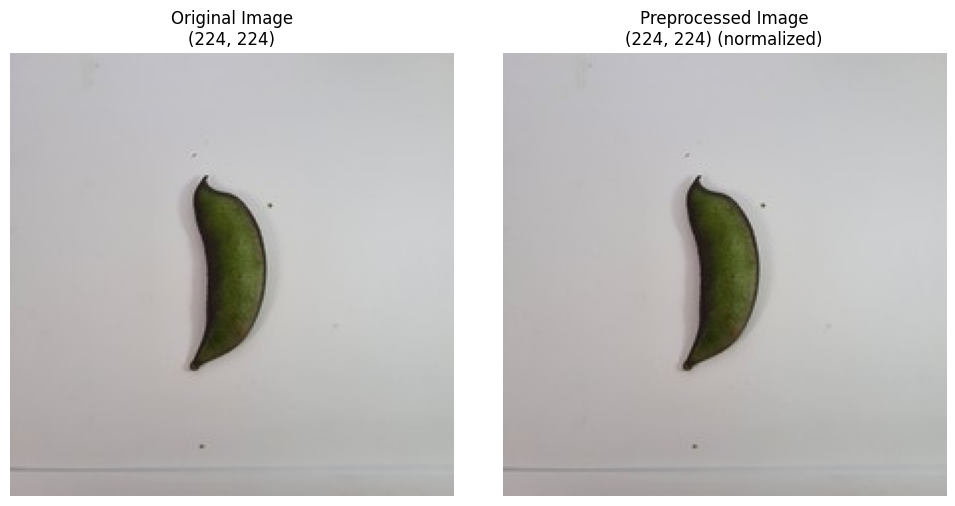

In [10]:
# PREPROCESSING 3: Resize dan normalisasi gambar (sample untuk demonstrasi)
TARGET_SIZE = (224, 224)

def preprocess_image(img_path, target_size=TARGET_SIZE):
    """
    Preprocessing gambar:
    1. Load gambar
    2. Resize ke target size
    3. Normalize pixel values ke range [0, 1]
    """
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalisasi
    return img_array

# Test preprocessing pada satu gambar
sample_img_path = df_train.iloc[0]['image_path']
print(f"Original image path: {sample_img_path}")

# Load original
original_img = Image.open(sample_img_path)
print(f"Original size: {original_img.size}")

# Preprocess
preprocessed_img = preprocess_image(sample_img_path)
print(f"Preprocessed shape: {preprocessed_img.shape}")
print(f"Pixel value range: [{preprocessed_img.min():.3f}, {preprocessed_img.max():.3f}]")

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img)
axes[0].set_title(f'Original Image\n{original_img.size}')
axes[0].axis('off')

axes[1].imshow(preprocessed_img)
axes[1].set_title(f'Preprocessed Image\n{preprocessed_img.shape[:2]} (normalized)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# PREPROCESSING 4: Simpan preprocessed dataframes ke CSV
# Untuk efisiensi, kita simpan metadata (path dan label) dalam CSV
# Preprocessing gambar akan dilakukan on-the-fly saat training

# Buat output directory (satu folder dengan notebook)
output_dir = 'Vegetables_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Simpan dataframes
train_csv_path = os.path.join(output_dir, 'train_ready.csv')
test_csv_path = os.path.join(output_dir, 'test_ready.csv')
val_csv_path = os.path.join(output_dir, 'val_ready.csv')

df_train.to_csv(train_csv_path, index=False)
df_test.to_csv(test_csv_path, index=False)
df_val.to_csv(val_csv_path, index=False)

print("✅ Preprocessed data saved:")
print(f"📁 Train CSV: {train_csv_path}")
print(f"📁 Test CSV: {test_csv_path}")
print(f"📁 Validation CSV: {val_csv_path}")

# Simpan label encoder mapping
import json
label_mapping = {int(idx): category for idx, category in enumerate(label_encoder.classes_)}
mapping_path = os.path.join(output_dir, 'label_mapping.json')
with open(mapping_path, 'w') as f:
    json.dump(label_mapping, f, indent=4)
print(f"📁 Label mapping: {mapping_path}")

print("\n✨ Preprocessing complete! Data ready for modeling.")

✅ Preprocessed data saved:
📁 Train CSV: Vegetables_preprocessing\train_ready.csv
📁 Test CSV: Vegetables_preprocessing\test_ready.csv
📁 Validation CSV: Vegetables_preprocessing\val_ready.csv
📁 Label mapping: Vegetables_preprocessing\label_mapping.json

✨ Preprocessing complete! Data ready for modeling.


In [13]:
# SUMMARY: Ringkasan hasil preprocessing
print("=" * 60)
print("📊 PREPROCESSING SUMMARY")
print("=" * 60)
print(f"\n✅ Dataset: Vegetable Image Dataset")
print(f"✅ Total Categories: {len(categories)}")
print(f"✅ Categories: {', '.join(categories)}")
print(f"\n✅ Data Split:")
print(f"   - Train: {len(df_train)} images")
print(f"   - Test: {len(df_test)} images")
print(f"   - Validation: {len(df_val)} images")
print(f"   - Total: {len(df_train) + len(df_test) + len(df_val)} images")
print(f"\n✅ Preprocessing Steps Completed:")
print(f"   1. ✓ Data Loading from Kaggle")
print(f"   2. ✓ Exploratory Data Analysis (EDA)")
print(f"   3. ✓ Data Distribution Analysis")
print(f"   4. ✓ Image Dimension Analysis")
print(f"   5. ✓ Label Encoding")
print(f"   6. ✓ Image Resize & Normalization (function ready)")
print(f"   7. ✓ Data Export to CSV")
print(f"\n✅ Output Files:")
print(f"   - {train_csv_path}")
print(f"   - {test_csv_path}")
print(f"   - {val_csv_path}")
print(f"   - {mapping_path}")
print(f"\n✅ Target Image Size: {TARGET_SIZE}")
print(f"✅ Normalization: Pixel values scaled to [0, 1]")
print("\n" + "=" * 60)
print("🎉 Ready for Model Training!")
print("=" * 60)

📊 PREPROCESSING SUMMARY

✅ Dataset: Vegetable Image Dataset
✅ Total Categories: 10
✅ Categories: Bean, Broccoli, Capsicum, Carrot, Cauliflower, Papaya, Potato, Pumpkin, Radish, Tomato

✅ Data Split:
   - Train: 10000 images
   - Test: 2000 images
   - Validation: 2000 images
   - Total: 14000 images

✅ Preprocessing Steps Completed:
   1. ✓ Data Loading from Kaggle
   2. ✓ Exploratory Data Analysis (EDA)
   3. ✓ Data Distribution Analysis
   4. ✓ Image Dimension Analysis
   5. ✓ Label Encoding
   6. ✓ Image Resize & Normalization (function ready)
   7. ✓ Data Export to CSV

✅ Output Files:
   - Vegetables_preprocessing\train_ready.csv
   - Vegetables_preprocessing\test_ready.csv
   - Vegetables_preprocessing\val_ready.csv
   - Vegetables_preprocessing\label_mapping.json

✅ Target Image Size: (224, 224)
✅ Normalization: Pixel values scaled to [0, 1]

🎉 Ready for Model Training!
